### Risultati SMOTENC

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [3]:
dataset = pd.read_csv("../csv/dataset_original.csv")
df = pd.read_csv("../csv/dataset_SMOTENC.csv")

In [6]:
dataset.shape

(3197, 21)

In [7]:
dataset.dtypes

BREED                         int64
GENDER_01                     int64
AGEATSURGERYmo              float64
BODYWEIGHTKG                float64
Taglia                        int64
BCS                         float64
YEAR                          int64
n_luxation                  float64
GENERATION                    int64
STEMSIZE                      int64
CUPSIZE                       int64
NECKSIZE                      int64
HEADSIZE                      int64
ALO                         float64
CUPRETROVERSION               int64
STEMANTEVERSIONREAL         float64
RECTUSFEMORISM.RELEASE        int64
first_lux_days_after_thr    float64
DIRECTION                   float64
LUX_01                        int64
LUX_CR                        int64
dtype: object

In [3]:
# Visualizza la distribuzione delle classi prima del bilanciamento
print(f"Distribuzione prima del resampling: {Counter(dataset['LUX_01'])}")

# Visualizza la distribuzione delle classi dopo il bilanciamento
print(f"Distribuzione dopo il resampling: {Counter(df['LUX_01'])}")

Distribuzione prima del resampling: Counter({0: 3056, 1: 141})
Distribuzione dopo il resampling: Counter({0: 3056, 1: 1528})


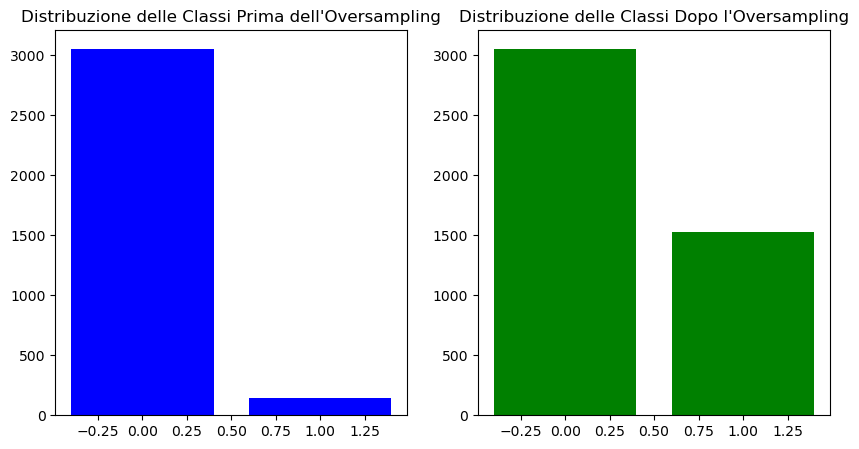

In [4]:
# Prima dell'oversampling
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(Counter(dataset['LUX_01']).keys(), Counter(dataset['LUX_01']).values(), color='blue')
plt.title('Distribuzione delle Classi Prima dell\'Oversampling')

# Dopo l'oversampling
plt.subplot(1, 2, 2)
plt.bar(Counter(df['LUX_01']).keys(), Counter(df['LUX_01']).values(), color='green')
plt.title('Distribuzione delle Classi Dopo l\'Oversampling')

plt.show()

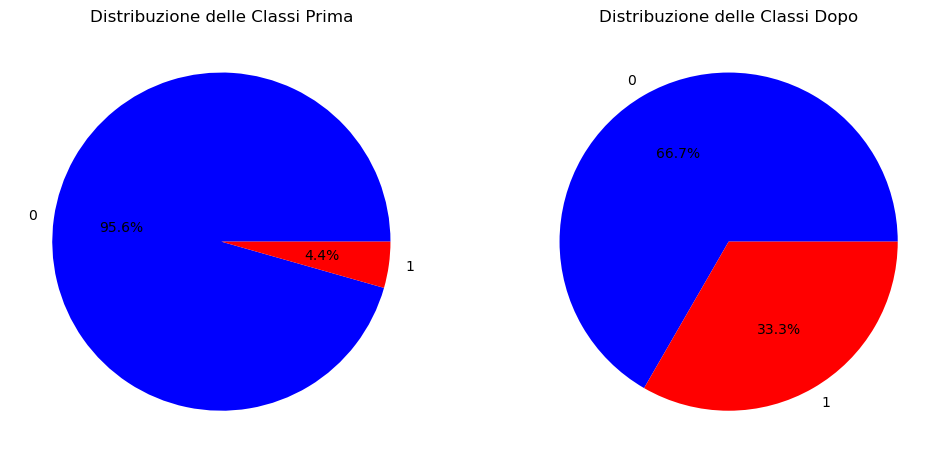

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(Counter(dataset['LUX_01']).values(), labels=Counter(dataset['LUX_01']).keys(), autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Distribuzione delle Classi Prima')

plt.subplot(1, 2, 2)
plt.pie(Counter(df['LUX_01']).values(), labels=Counter(df['LUX_01']).keys(), autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Distribuzione delle Classi Dopo')

plt.show()

In [6]:
y = dataset.drop(['LUX_01'], axis=1)
y

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,n_luxation,GENERATION,STEMSIZE,CUPSIZE,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,first_lux_days_after_thr,DIRECTION,LUX_CR
0,3,0,56.500000,31.6,1,5.0,2021,-1.0,6,0,4,4,1,46.0,15,17.7,0,-1.0,-1.0,0
1,8,0,9.400000,40.9,1,5.0,2021,-1.0,6,1,6,5,1,40.0,25,27.7,0,-1.0,-1.0,0
2,10,0,15.133333,35.0,1,5.0,2021,-1.0,6,0,4,4,1,42.0,20,27.7,1,-1.0,-1.0,0
3,6,0,83.433333,18.7,0,6.0,2021,-1.0,6,2,2,4,0,40.0,18,24.2,0,-1.0,-1.0,0
4,5,0,7.533333,36.4,1,4.0,2021,-1.0,6,1,6,5,1,42.0,28,25.9,1,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,3,0,57.433333,25.0,1,5.0,2010,1.0,4,3,1,3,0,43.0,32,27.7,0,35.0,0.0,1
3193,5,1,49.233333,38.0,1,6.0,2009,1.0,4,0,3,4,0,48.0,26,25.9,0,18.0,0.0,1
3194,13,0,38.033333,43.0,1,5.0,2008,2.0,3,1,3,4,0,48.0,4,11.5,0,30.0,0.0,1
3195,5,1,11.533333,28.0,1,5.0,2001,1.0,2,0,2,4,0,52.0,10,31.3,0,26.0,0.0,1


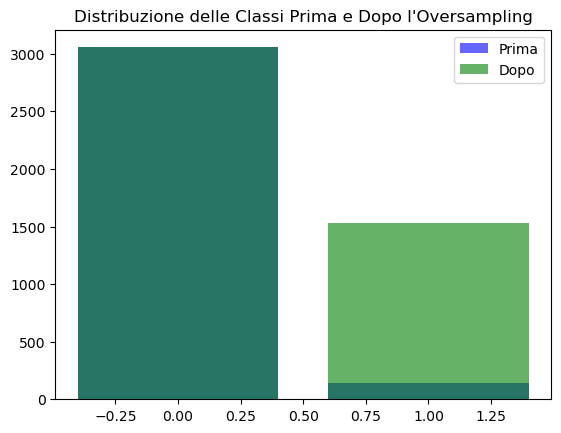

In [7]:
plt.bar(Counter(dataset['LUX_01']).keys(), Counter(dataset['LUX_01']).values(), color='blue', alpha=0.6, label='Prima')
plt.bar(Counter(df['LUX_01']).keys(), Counter(df['LUX_01']).values(), color='green', alpha=0.6, label='Dopo')
plt.legend()
plt.title('Distribuzione delle Classi Prima e Dopo l\'Oversampling')
plt.show()

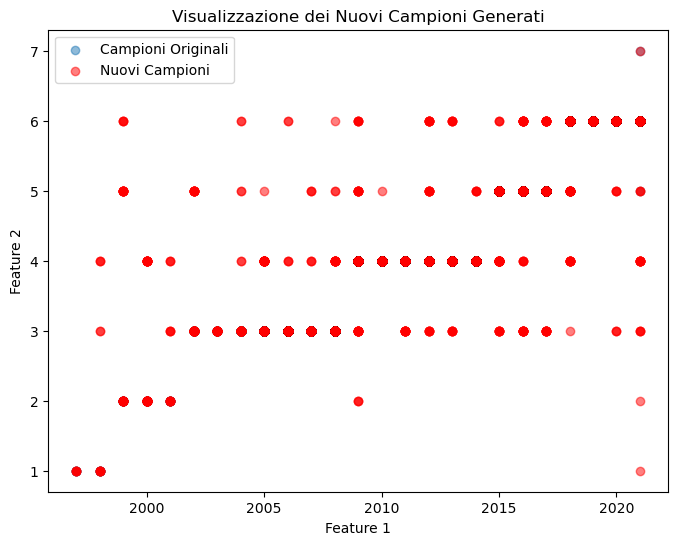

In [8]:
# Seleziona le prime due feature (o altre due feature a tua scelta)
plt.figure(figsize=(8, 6))

# Campioni originali
plt.scatter(dataset['YEAR'], dataset['GENERATION'], label='Campioni Originali', alpha=0.5)

# Nuovi campioni generati
plt.scatter(df['YEAR'], df['GENERATION'], label='Nuovi Campioni', alpha=0.5, color='red')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Visualizzazione dei Nuovi Campioni Generati")
plt.show()

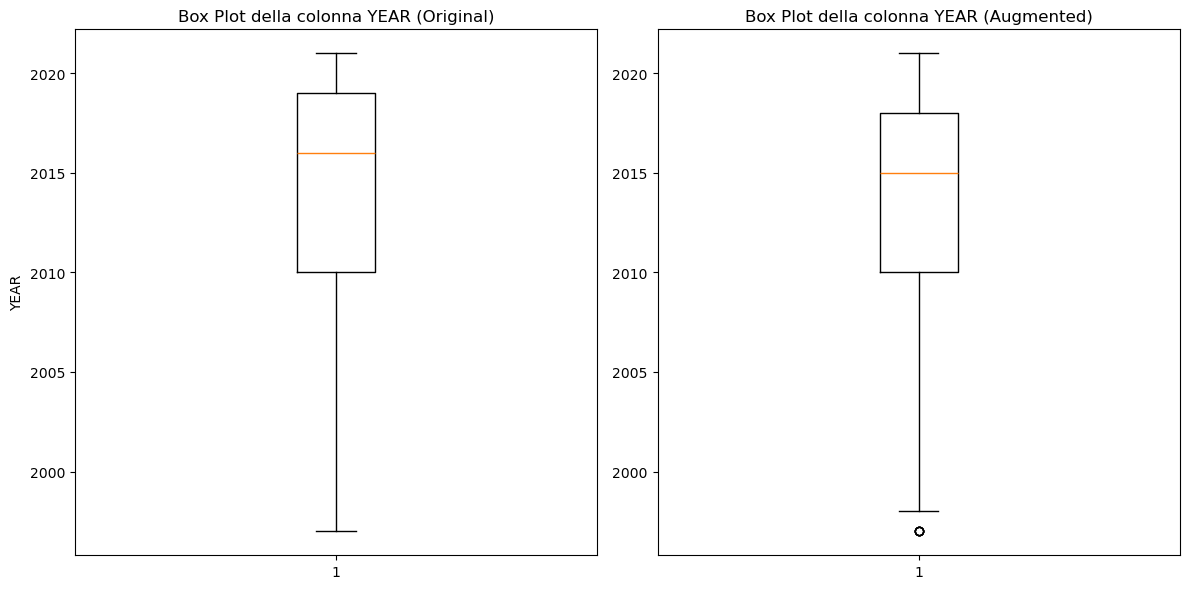

In [9]:
# Imposta la figura per i due box plot separati
plt.figure(figsize=(12, 6))

# Primo box plot per il dataset originale
plt.subplot(1, 2, 1)  # 1 riga, 2 colonne, 1° subplot
plt.boxplot(dataset['YEAR'])
plt.title('Box Plot della colonna YEAR (Original)')
plt.ylabel('YEAR')

# Secondo box plot per il dataset aumentato
plt.subplot(1, 2, 2)  # 1 riga, 2 colonne, 2° subplot
plt.boxplot(df['YEAR'])
plt.title('Box Plot della colonna YEAR (Augmented)')

# Mostra il grafico
plt.tight_layout()
plt.show()

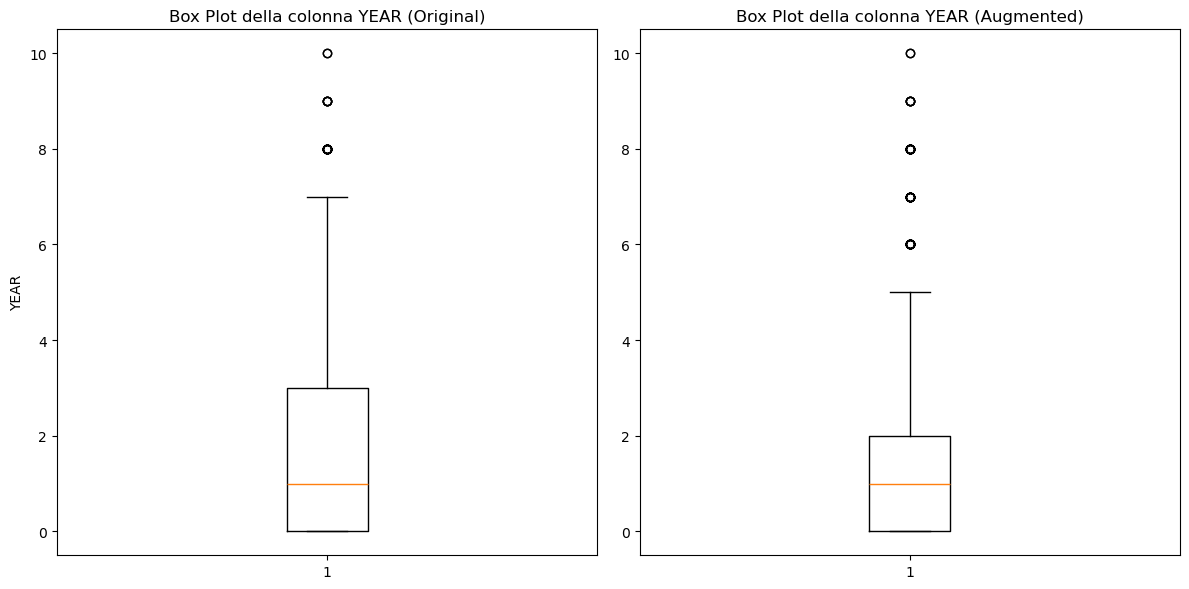

In [10]:
# Imposta la figura per i due box plot separati
plt.figure(figsize=(12, 6))

# Primo box plot per il dataset originale
plt.subplot(1, 2, 1)  # 1 riga, 2 colonne, 1° subplot
plt.boxplot(dataset['STEMSIZE'])
plt.title('Box Plot della colonna YEAR (Original)')
plt.ylabel('YEAR')

# Secondo box plot per il dataset aumentato
plt.subplot(1, 2, 2)  # 1 riga, 2 colonne, 2° subplot
plt.boxplot(df['STEMSIZE'])
plt.title('Box Plot della colonna YEAR (Augmented)')

# Mostra il grafico
plt.tight_layout()
plt.show()

In [11]:
dataset.columns

Index(['BREED', 'GENDER_01', 'AGEATSURGERYmo', 'BODYWEIGHTKG', 'Taglia', 'BCS',
       'YEAR', 'n_luxation', 'GENERATION', 'STEMSIZE', 'CUPSIZE', 'NECKSIZE',
       'HEADSIZE', 'ALO', 'CUPRETROVERSION', 'STEMANTEVERSIONREAL',
       'RECTUSFEMORISM.RELEASE', 'first_lux_days_after_thr', 'DIRECTION',
       'LUX_01', 'LUX_CR'],
      dtype='object')

In [12]:
import sys
sys.path.append("../base_lib")

import functions as func

2024-08-13 21:02:43.898689: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-13 21:02:43.900860: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-13 21:02:43.943007: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-13 21:02:44.239933: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-13 21:02:46.284061: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [13]:
dataset = func.drop_cols(dataset)

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,GENERATION,STEMSIZE,CUPSIZE,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,LUX_01,LUX_CR
BREED,1.000000,0.027166,-0.014028,-0.025418,0.110383,0.139797,0.065465,0.058535,-0.078307,-0.077249,-0.075571,-0.058671,0.038868,-0.032023,-0.036417,-0.058195,-0.017493,0.037387
GENDER_01,0.027166,1.000000,-0.027979,-0.245394,-0.086088,0.055765,0.008949,0.010490,-0.003698,-0.186105,-0.125310,-0.131631,-0.035740,-0.017065,0.018553,0.034807,-0.033912,-0.007585
AGEATSURGERYmo,-0.014028,-0.027979,1.000000,0.223443,0.081939,0.249440,-0.073647,-0.065173,-0.042595,0.055544,0.119718,0.001310,0.087822,0.100177,0.065522,-0.050598,-0.073645,-0.278906
BODYWEIGHTKG,-0.025418,-0.245394,0.223443,1.000000,0.473659,0.347751,-0.098832,-0.101435,-0.145992,0.729568,0.567729,0.508116,0.171239,0.051870,0.023079,-0.024279,0.026042,-0.123078
Taglia,0.110383,-0.086088,0.081939,0.473659,1.000000,0.190115,-0.087625,-0.088802,-0.337549,0.337022,0.315995,0.192690,0.052093,0.008681,0.031939,0.020473,0.003735,-0.121278
BCS,0.139797,0.055765,0.249440,0.347751,0.190115,1.000000,-0.048013,-0.070630,-0.069595,0.121629,0.066432,0.057522,0.147730,0.018362,-0.009160,-0.026356,-0.037610,-0.097834
YEAR,0.065465,0.008949,-0.073647,-0.098832,-0.087625,-0.048013,1.000000,0.962851,0.167868,0.208522,-0.026880,0.384242,-0.145330,0.206113,-0.397424,0.136573,-0.091297,0.258462
GENERATION,0.058535,0.010490,-0.065173,-0.101435,-0.088802,-0.070630,0.962851,1.000000,0.170209,0.209889,0.012168,0.394698,-0.140741,0.190490,-0.417568,0.089661,-0.088929,0.249867
STEMSIZE,-0.078307,-0.003698,-0.042595,-0.145992,-0.337549,-0.069595,0.167868,0.170209,1.000000,-0.128618,-0.155353,-0.009715,-0.029870,0.028605,-0.130769,-0.025681,-0.020564,0.106314
CUPSIZE,-0.077249,-0.186105,0.055544,0.729568,0.337022,0.121629,0.208522,0.209889,-0.128618,1.000000,0.584464,0.845895,0.084650,0.105976,-0.070765,0.031145,0.012870,0.029853


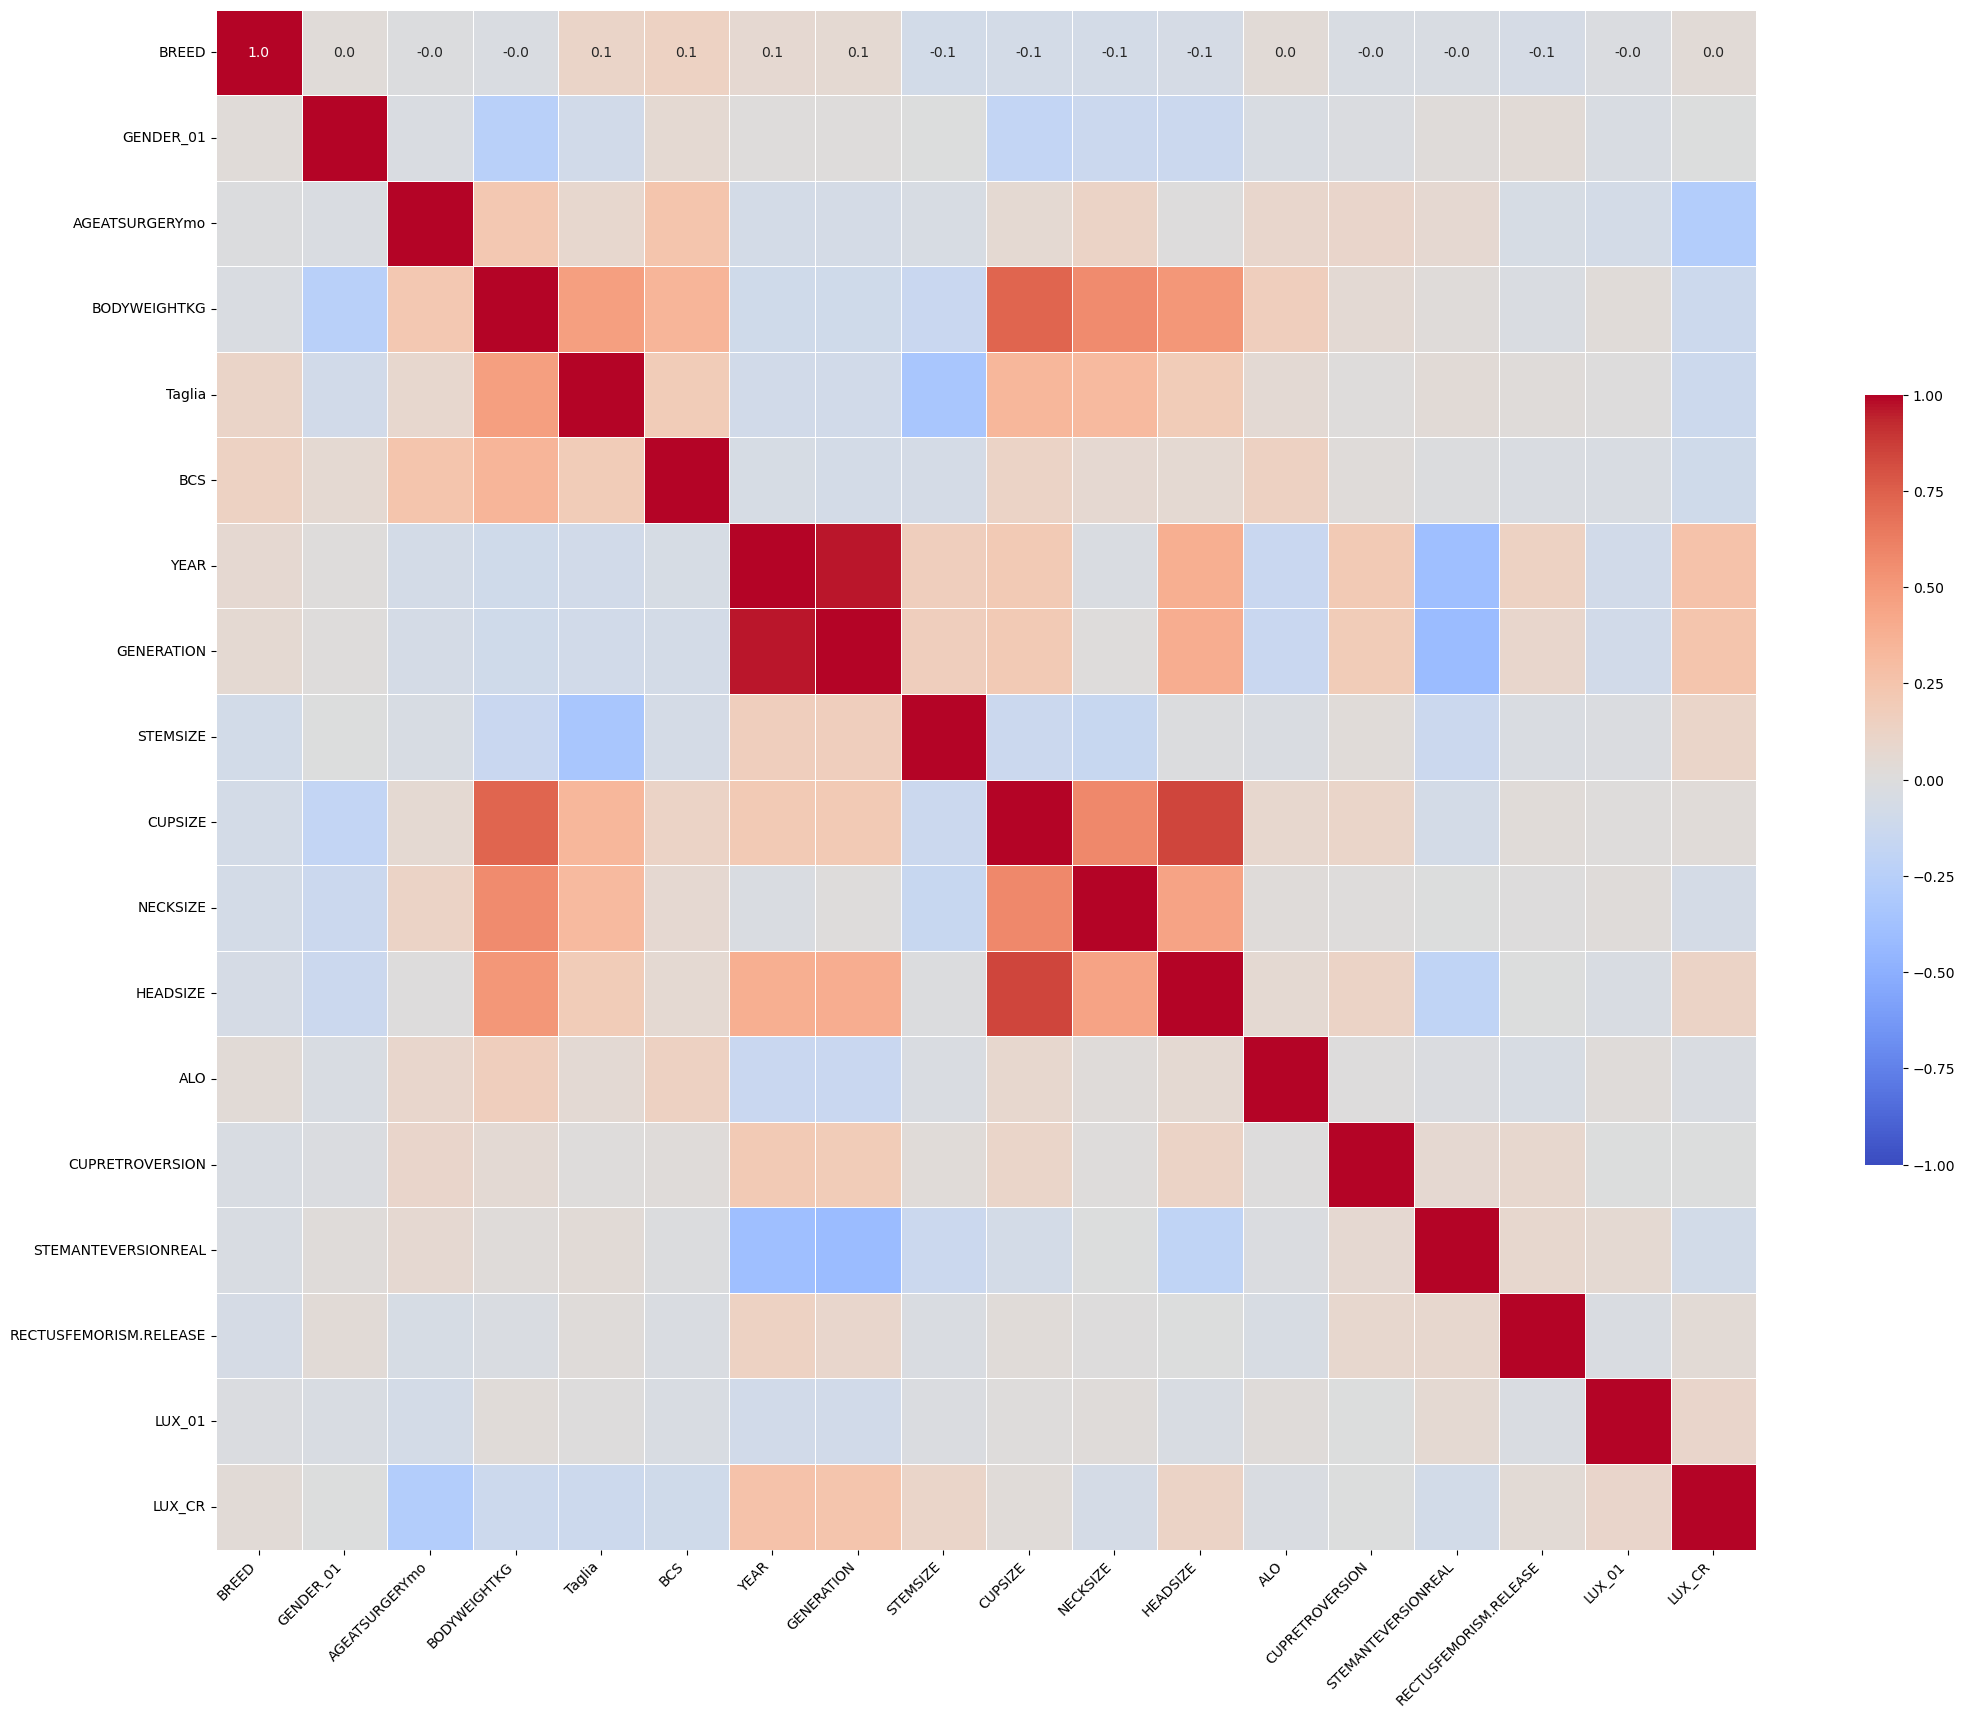

In [14]:
func.display_corr_matrix(dataset)

,BREED,GENDER_01,AGEATSURGERYmo,BODYWEIGHTKG,Taglia,BCS,YEAR,GENERATION,STEMSIZE,CUPSIZE,NECKSIZE,HEADSIZE,ALO,CUPRETROVERSION,STEMANTEVERSIONREAL,RECTUSFEMORISM.RELEASE,LUX_CR,LUX_01
BREED,1.000000,-0.001573,-0.002249,-0.048865,0.115529,0.102625,0.043100,0.011481,-0.092547,-0.069130,-0.082881,-0.071590,0.039075,-0.016971,0.013624,-0.050662,0.073736,0.003557
GENDER_01,-0.001573,1.000000,-0.066169,-0.262410,-0.119731,0.062898,0.023891,0.034737,0.059600,-0.213529,-0.135591,-0.140992,-0.023959,-0.032952,-0.022712,0.053471,-0.084385,-0.105218
AGEATSURGERYmo,-0.002249,-0.066169,1.000000,0.183790,0.063676,0.223496,-0.129407,-0.102382,-0.008748,0.013844,0.103433,-0.025405,0.062015,0.143494,0.098303,-0.002706,-0.326826,-0.171428
BODYWEIGHTKG,-0.048865,-0.262410,0.183790,1.000000,0.429712,0.326588,-0.130000,-0.129552,-0.158471,0.645874,0.532163,0.452675,0.203235,0.058836,0.036779,-0.034468,-0.098200,0.062240
Taglia,0.115529,-0.119731,0.063676,0.429712,1.000000,0.153333,-0.104991,-0.111309,-0.340782,0.308072,0.276867,0.161692,0.062749,0.014075,0.047185,-0.010084,-0.046236,0.109698
BCS,0.102625,0.062898,0.223496,0.326588,0.153333,1.000000,-0.054456,-0.055623,-0.050251,0.098961,0.070468,0.047923,0.132790,0.020319,-0.013210,-0.003292,-0.118105,-0.088430
YEAR,0.043100,0.023891,-0.129407,-0.130000,-0.104991,-0.054456,1.000000,0.863014,0.168552,0.174821,-0.019886,0.364256,-0.151665,0.135160,-0.371280,0.147165,0.262076,-0.162556
GENERATION,0.011481,0.034737,-0.102382,-0.129552,-0.111309,-0.055623,0.863014,1.000000,0.167769,0.195799,0.012635,0.396196,-0.156180,0.116292,-0.396083,0.111484,0.240979,-0.163530
STEMSIZE,-0.092547,0.059600,-0.008748,-0.158471,-0.340782,-0.050251,0.168552,0.167769,1.000000,-0.126474,-0.114019,0.006234,-0.040605,0.033214,-0.130782,0.021147,0.018614,-0.172403
CUPSIZE,-0.069130,-0.213529,0.013844,0.645874,0.308072,0.098961,0.174821,0.195799,-0.126474,1.000000,0.552398,0.807077,0.061101,0.067322,-0.060352,0.032911,0.082440,-0.016873


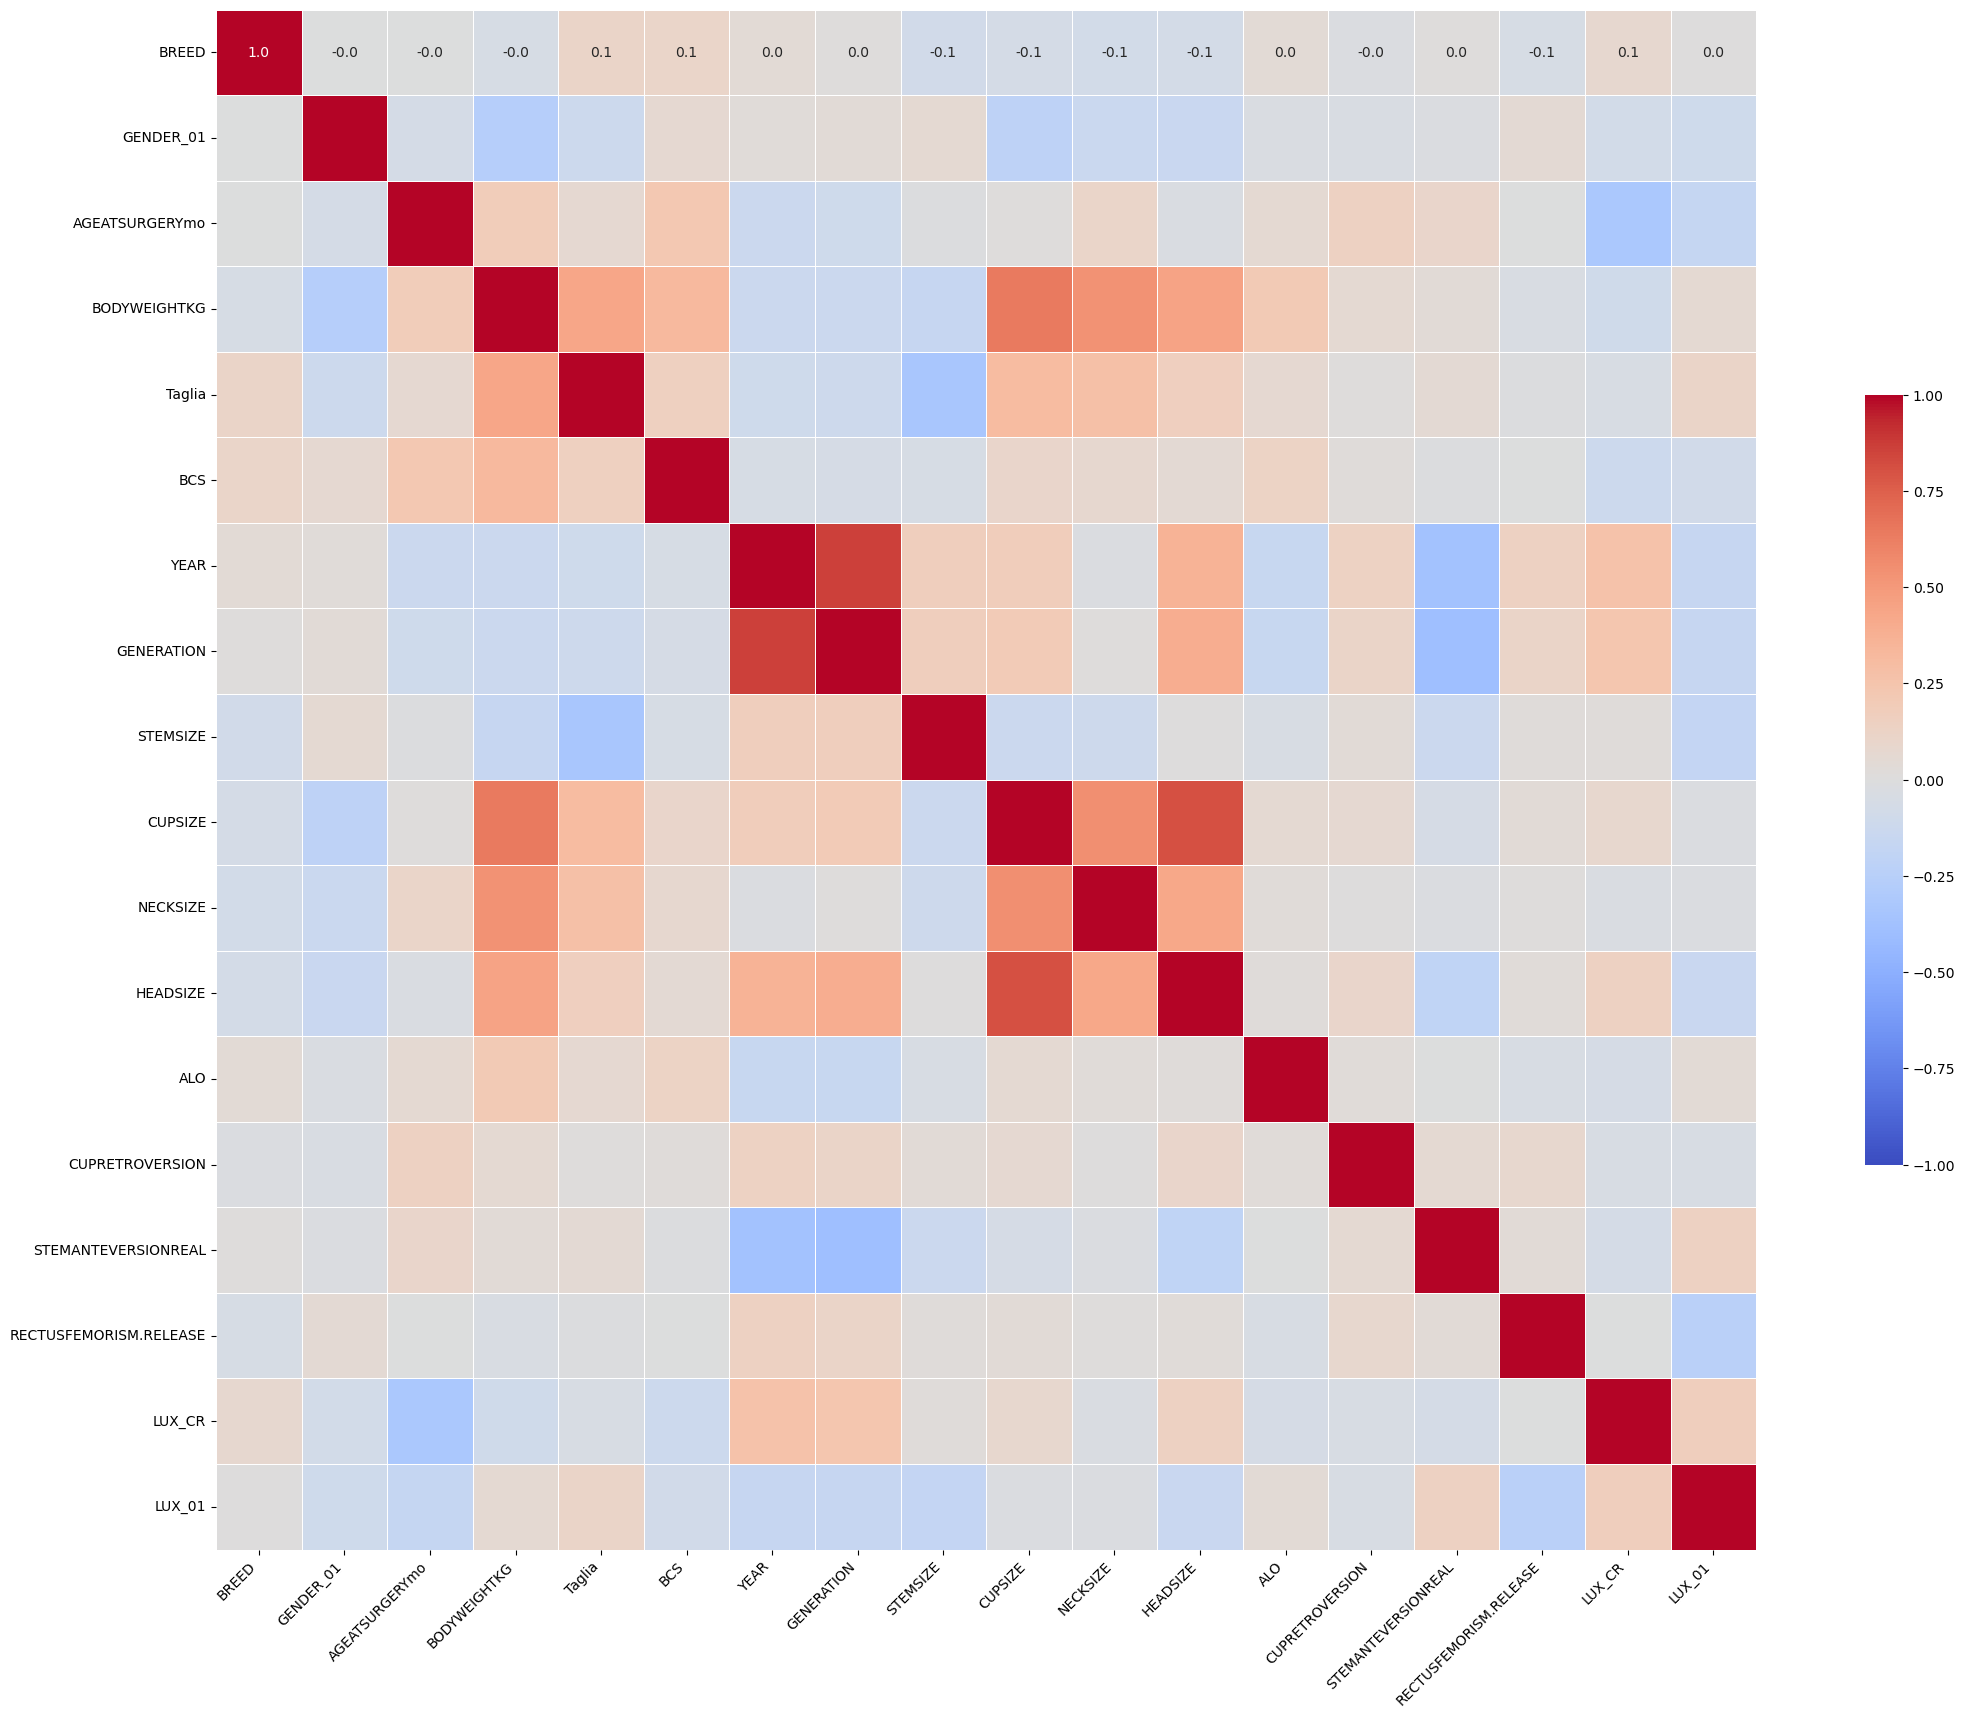

In [15]:
df = func.drop_cols(df)

func.display_corr_matrix(df)